# <font color="maganta"><h3 align="center">Decision Tree (Classifier)</h3></font> 

<h3 style="color:brown">Import Libraries</h3>

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
import matplotlib.pyplot as plt
from termcolor import colored

import warnings as wr
wr.filterwarnings('ignore')

<h3 style="color:brown">Data Reading</h3>

In [2]:
df = pd.read_csv('game data.csv')
df

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [3]:
df.drop('Days', axis = 1, inplace=True)

In [4]:
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [5]:
x = df.drop('Wear Jacket?',axis = 1)

In [6]:
x

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor
5,Sunny,Warm,Outdoor
6,Cloudy,Warm,Indoor
7,Sunny,Warm,Indoor


In [7]:
y = df['Wear Jacket?']

In [8]:
y

0     No
1    Yes
2     No
3    Yes
4    Yes
5     No
6     No
7     No
Name: Wear Jacket?, dtype: object

In [9]:
x.value_counts()

Outlook  Temprature  Routine
Cloudy   Cold        Indoor     1
                     Outdoor    1
         Warm        Indoor     1
                     Outdoor    1
Sunny    Cold        Indoor     1
                     Outdoor    1
         Warm        Indoor     1
                     Outdoor    1
dtype: int64

In [10]:
x.Outlook.value_counts()

Sunny     4
Cloudy    4
Name: Outlook, dtype: int64

In [11]:
x.Temprature.value_counts()

Cold    4
Warm    4
Name: Temprature, dtype: int64

In [12]:
x.Routine.value_counts()

Indoor     4
Outdoor    4
Name: Routine, dtype: int64

<h2 style="color:green">Feature Encoding</h2>

Temprature -> (Warm = 1, Cold = 0)<br>
Outlook -> (Sunny = 1, Cloudy = 0)<br>
Routine -> (Indoor = 1, Outdoor = 0)


<h4 style="color:indigo">1st Way: Using replace method</h4>

In [13]:
x = x.replace({'Warm':1, 'Cold': 0, 'Sunny': 1, 'Cloudy': 0, 'Indoor': 1, 'Outdoor': 0})

In [14]:
x

,Outlook,Temprature,Routine
0,1,0,1
1,0,0,1
2,0,1,0
3,1,0,0
4,0,0,0
5,1,1,0
6,0,1,1
7,1,1,1


<h4 style="color:indigo">2nd Way: Using Label Encoder</h4>

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

x_label = x.copy()
for i in x.columns:
    x_label[i] = le.fit_transform(x_label[[i]])
    
x_label

,Outlook,Temprature,Routine
0,1,0,1
1,0,0,1
2,0,1,0
3,1,0,0
4,0,0,0
5,1,1,0
6,0,1,1
7,1,1,1


<h2 style="color:green">Implementing Decision Tree Classifier Model</h2>

In [16]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier() #default criterion='gini'

In [17]:
clf.fit(x,y) #training decision tree

DecisionTreeClassifier()

In [18]:
clf.predict(x)

array(['No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No'], dtype=object)

<h4 style="color:teal">Prediction of Wear Jacket for Warm, Sunny , Indoor</h4>

In [31]:
a = clf.predict([[1,1,1]])
print(colored(f'Wear Jacket: {a}',color = 'magenta',attrs = ['bold']))

Wear Jacket: ['No']


<h4 style="color:teal"> Prediction of Wear Jacket for Warm, Cloudy , Indoor</h4>

In [29]:
b = clf.predict([[1,0,1]])
print(colored(f'Wear Jacket: {b}',color = 'magenta',attrs = ['bold']))

Wear Jacket: ['No']


<h4 style="color:teal">Prediction of Wear Jacket for Cold, Cloudy , Outdoor</h4>

In [30]:
print(colored(f'Wear Jacket: {clf.predict([[0,0,0]])}',color = 'magenta',attrs = ['bold']))

Wear Jacket: ['Yes']


<h2 style="color:green">Visualization of Tree</h2>

[Text(0.6, 0.875, 'x[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

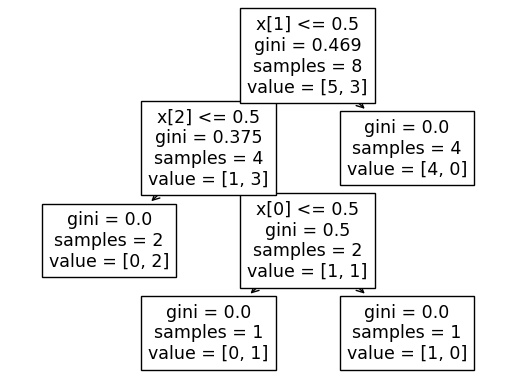

In [22]:
tree.plot_tree(clf)

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

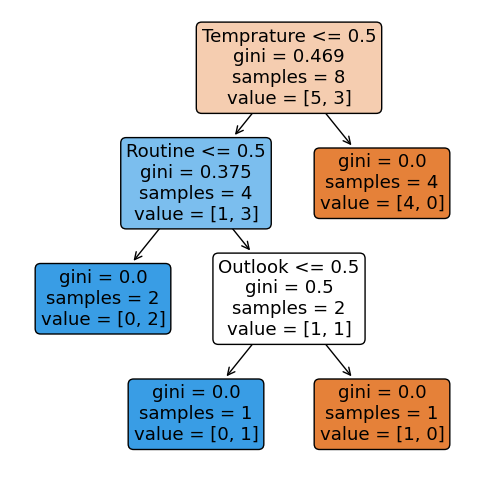

In [23]:
plt.figure(figsize=(6,6))
tree.plot_tree(clf, feature_names=x.columns, filled=True, rounded = True)

<h2 style="color:green">Decision Tree Based on 'Entropy'</h2>

In [24]:
plt2 = DecisionTreeClassifier(criterion = 'entropy')

In [25]:
plt2.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.6, 0.875, 'x[1] <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'x[2] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]')]

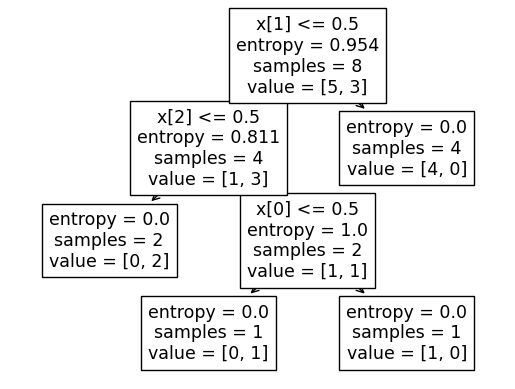

In [26]:
tree.plot_tree(plt2)

[Text(0.6, 0.875, 'Temprature <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'Routine <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Outlook <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]')]

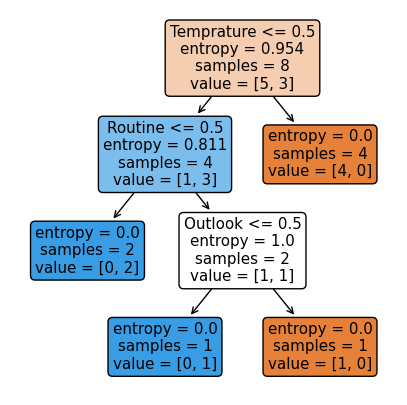

In [27]:
plt.figure(figsize=(5,5))
tree.plot_tree(plt2, feature_names=x.columns, filled=True, rounded = True)